<a href="https://colab.research.google.com/github/NEUGUAGE/Neuron_ML_Model/blob/main/CRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To:#
1.

2.Plasticity(nature paper)

In [ ]:
pip install torchdiffeq

In [ ]:
import torch
import matplotlib.pyplot as plt
from scipy.stats import vonmises
import numpy as np
from torchdiffeq import odeint

# Ring Attractor ODESolver

## `Ring Neuron Visual Input`

1.   One Stripe

2.   Two Stripe 180 degree apart

3.   One smaller Stripe, one bigger stripe, 180 degree apart






In [ ]:
case =3

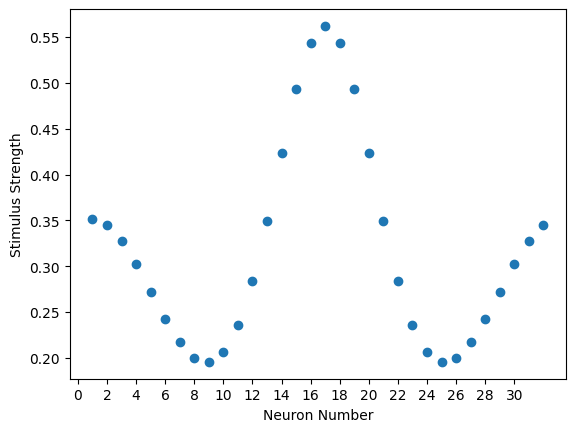

In [ ]:
import matplotlib.pyplot as plt
import torch
from scipy.stats import vonmises

# Initialize g as a global tensor variable
g = None

# Function to create a von Mises distribution and plot it
def plot_von_mises(kappa, mu):
    global g  # Declare g as a global variable to modify it in this function
    x = torch.linspace(-torch.pi, torch.pi, 33)
    g = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa, loc=mu), dtype=torch.float)
    g=g[:-1] #this thing eusure the circular nature of the activity
    plt.xlabel('Neuron Number')
    plt.ylabel('Stimulus Strength')
    plt.xticks(np.arange(0, n_max, 2))
    plt.scatter(torch.linspace(1, 32, 32), g)

# Function to create a two-bump von Mises distribution and plot it
def plot_two_bump_von_mises(kappa_1, mu_1, kappa_2, mu_2):
    global g  # Declare g as a global variable to modify it in this function
    x = torch.linspace(-torch.pi, torch.pi, 33)
    g_1 = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa_1, loc=mu_1), dtype=torch.float)
    g_2 = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa_2, loc=mu_2), dtype=torch.float)
    g = g_1 + g_2  # Combining the two distributions
    g=g[:-1] #this thing eusure the circular nature of the activity
    #temporal action
    plt.scatter(torch.linspace(1, 32, 32), g)
    plt.xlabel('Neuron Number')
    plt.ylabel('Stimulus Strength')
    plt.xticks(np.arange(0, 32, 2))
    plt.show()
# Function to create a several-bump von Mises distribution and plot it
def plot_four_bump_von_mises(kappa_1, mu_1, kappa_2, mu_2,kappa_3, mu_3, kappa_4, mu_4):
    global g  # Declare g as a global variable to modify it in this function
    x = torch.linspace(-torch.pi, torch.pi, 33)
    g_1 = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa_1, loc=mu_1), dtype=torch.float)
    g_2 = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa_2, loc=mu_2), dtype=torch.float)
    g_3 = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa_3, loc=mu_3), dtype=torch.float)
    g_4 = torch.tensor(vonmises.pdf(x.numpy(), kappa=kappa_4, loc=mu_4), dtype=torch.float)
    g = g_1 + g_2+g_3+g_4  # Combining the two distributions
    g=g[:-1] #this thing eusure the circular nature of the activity
    #temporal action
    plt.scatter(torch.linspace(1, 32, 32), g)
    plt.xlabel('Neuron Number')
    plt.ylabel('Stimulus Strength')
    plt.xticks(np.arange(0, n_max, 2))
    plt.show()


# Your initial code for case 1 and case 2
if case == 1:
    kappa_1 = 2

    mu_1 = 0  # Mean of the first distribution
    plot_von_mises(kappa_1, mu_1)
    plt.legend()
    plt.show()

if case == 2:
    kappa_1 = 2
    mu_1 = 0  # Mean of the first bump
    kappa_2 = 2
    mu_2 = torch.pi # Mean of the second bump

    plot_two_bump_von_mises(kappa_1, mu_1, kappa_2, mu_2)

if case == 3:
    kappa_1 = 2
    mu_1 = 0  # Mean of the first bump
    kappa_2 = 1
    mu_2 = torch.pi # Mean of the second bump

    plot_two_bump_von_mises(kappa_1, mu_1, kappa_2, mu_2)

if case == 4:
    kappa_1 = 1.9
    mu_1 = 0  # Mean of the first bump
    kappa_2 = 0.6
    mu_2 = torch.pi/3 # Mean of the second bump
    kappa_3 = 1.4
    mu_3 = -torch.pi/2  # Mean of the first bump
    kappa_4 = 1.3
    mu_4 = torch.pi # Mean of the second bump

    plot_four_bump_von_mises(kappa_1, mu_1, kappa_2, mu_2,kappa_3, mu_3, kappa_4, mu_4)


To Do
1. fixed the matrix:Each ring Neurons should have strongest inhibition to certain EPG.

2. remove the velocity, visual stimulation; two bars, one bar, other random distribution that represents different visual stimuli

## `Connection Initialization`

So For here We need some connection change over time


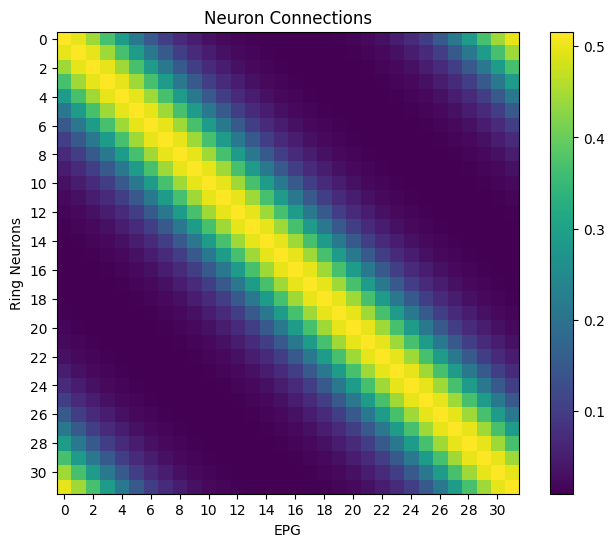

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

m_max = 32 # Number of neurons of type A
n_max = 32# Number of neurons of type B

# Initialize the matrix
W = torch.zeros(m_max, n_max)

# Loop through each neuron of type A
for row in range(-16,16):
    # Create a normal distribution centered around each neuron of type B
    mean = row  # Ensure a different mean for each row
    x = torch.linspace(-torch.pi, torch.pi, 33)
    weights = torch.tensor(vonmises.pdf(x.numpy(), kappa=2, loc=torch.pi*(row*2)/m_max), dtype=torch.float)
    weights=weights[:-1] #this thing eusure the circular nature of the activity

    # Assign the weights to the corresponding row in the matrix
    W[row+16] = weights


# Convert the PyTorch tensor to a NumPy array for plotting
#W = torch.clamp(W, min=0,max=0.33)

W_np = W.numpy()
# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(W_np, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Neuron Connections')
plt.xlabel('EPG')
plt.ylabel('Ring Neurons')
plt.xticks(np.arange(0, n_max, 2))
plt.yticks(np.arange(0, m_max, 2))
plt.show()


## `Ring Neuron Inhibition`

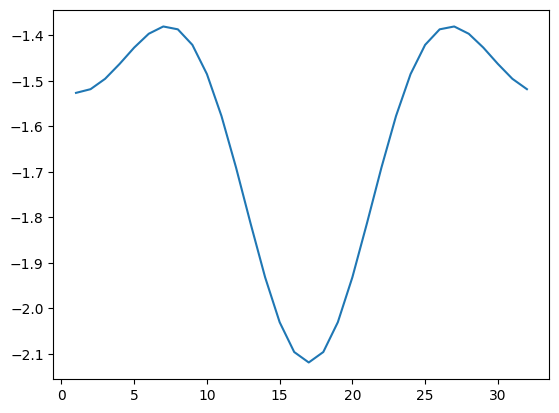

In [ ]:
# Initialize the parameters
n_max = 32
m_max = 32


# Initialize other external inputs such as current injections by optogenetic stimulation to compass neurons
s = torch.zeros(1,n_max)

# Calculate the external input to a compass neuron
I = -torch.matmul(g, torch.transpose(W, 0, 1)) +s

I=I.squeeze(1)

plt.plot(torch.linspace(1,32,32),I.view(32))


## `ODE Solving`

In [ ]:
def RingAttractorODESolver(t, y):
    v = 0.3# some number between -0.3 and +0.3 works good
    tau = 0.05
    alpha = -7.76 #local exicitation
    beta = 1.96 #global inhibition
    D = 5.19 #local exicitation
    tmp = alpha*y + D*(torch.roll(y,-1)+torch.roll(y,1)) - beta*torch.sum(y) + 1 +I*0.001 +v*(torch.roll(y,-1)-torch.roll(y,1))/2
    tmp[tmp<0] = 0
    #heaviside step function
    dydt = ( -y + tmp )/tau

    return dydt

In [ ]:
tspan = torch.linspace(0, 10, 1000)
yinit = torch.rand((32,))*0.05
sol = odeint(RingAttractorODESolver, yinit, tspan)

## `Graph Plot`

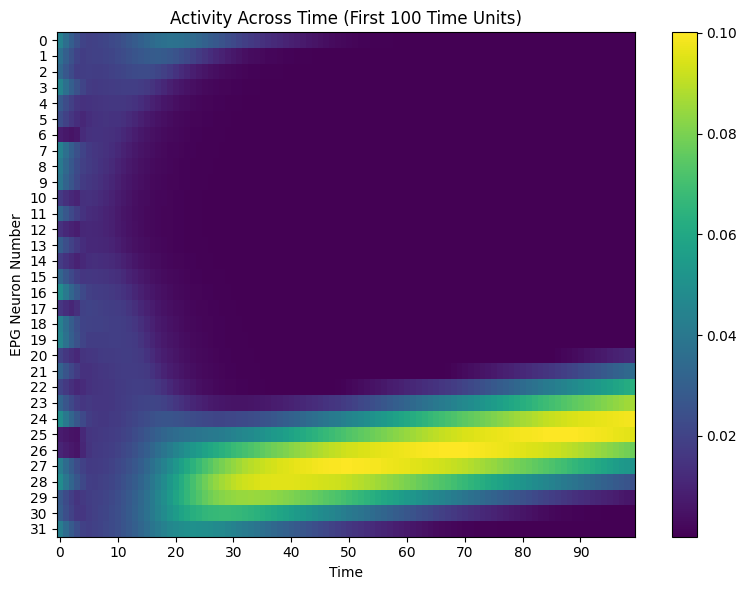

In [ ]:
# Plotting the smaller heatmap for the first 100 time units
  # Adjust the figure size as needed
# Plotting the smaller heatmap for the first 100 time units
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(sol[:100, :].T, cmap='viridis', aspect='auto')  # Limiting to the first 100 time units

# Set ticks for every unit on y-axis (representing time)
plt.yticks(np.arange(0, 32, 1))
plt.ylabel('EPG Neuron Number')

# Set ticks for every time unit on x-axis
plt.xticks(np.arange(0, 100, 10))  # Adjust ticks for the smaller time window
plt.xlabel('Time')

plt.colorbar()
plt.title('Activity Across Time (First 100 Time Units)')
plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

In [ ]:
Solve the equation based on randomized plasticity

In [ ]:
def Post_Synaptic_Rule_Connection_Solver(t, y):
    v = 0.3# some number between -0.3 and +0.3 works good
    tau = 0.05
    alpha = -7.76 #local exicitation
    beta = 1.96 #global inhibition
    D = 5.19 #local exicitation
    tmp = alpha*y + D*(torch.roll(y,-1)+torch.roll(y,1)) - beta*torch.sum(y) + 1 +I*0.001 +v*(torch.roll(y,-1)-torch.roll(y,1))/2
    tmp[tmp<0] = 0
    #heaviside step function
    dydt = ( -y + tmp )/tau

    return dydt

In [6]:
def Pre_Synaptic_Rule_Connection_Solver(t, y):
    v=0.3
    g_0=0.33
    learning_rate= v**2*0.5
    w_max=0.33
    dydt = learning_rate*
    print(learning_rate)
    return dydt